In [ ]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS

# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS

turbo_fan_data = pd.read_csv('/content/drive/MyDrive/IOT/nasa_turbo_fan/train_FD001.txt',sep = " ",header = None)
turbo_fan_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
cols = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3',
        'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3',
        'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8',
        'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13',
        'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
        'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
turbo_fan_data = turbo_fan_data[[c for c in range(0,26)]]
turbo_fan_data.columns = cols
turbo_fan_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
max_cycle = turbo_fan_data.groupby(['ID'], sort=False)['Cycle'].max().reset_index().rename(columns={'Cycle':'MaxCycle'})
max_cycle.head()

,ID,MaxCycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [ ]:
# merge back to original dataset
FD001_df = pd.merge(turbo_fan_data, max_cycle, how='inner', on='ID')
FD001_df['RUL'] = FD001_df['MaxCycle'] - FD001_df['Cycle']
FD001_df

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,MaxCycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


In [ ]:
FD001_df[['Cycle', 'RUL']]

,Cycle,RUL
0,1,191
1,2,190
2,3,189
3,4,188
4,5,187
...,...,...
20626,196,4
20627,197,3
20628,198,2
20629,199,1


In [ ]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

<Axes: xlabel='Cycle', ylabel='RUL'>

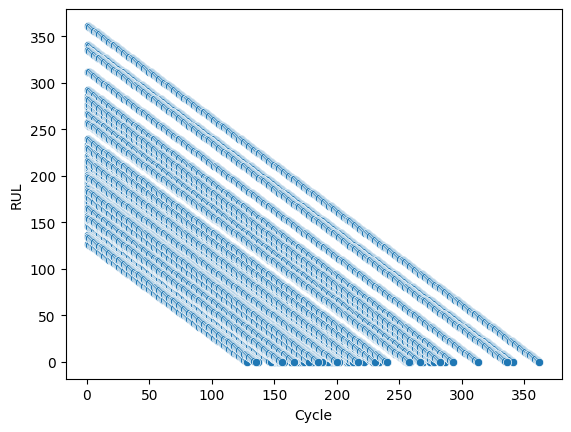

In [ ]:
sns.scatterplot(x='Cycle',
                y='RUL', data=FD001_df)

In [ ]:

# creating feature variables
X = FD001_df.drop('RUL',axis= 1)
# X = X.drop('Cycle',axis= 1)
# X = X.drop('ID',axis= 1)
X = X.drop('MaxCycle',axis= 1)
# X = X.drop('OpSet1',axis =1)
# X = X.drop('OpSet2',axis =1)
# X = X.drop('OpSet3',axis =1)
y = FD001_df['RUL']
print(X)
print(y)

        ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure12

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1595.0218192495463
mean_absolute_error :  30.753936323643156


In [ ]:
X_test.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
14206,71,77,-0.0022,-0.0003,100.0,518.67,642.73,1583.58,1404.94,14.62,...,521.39,2388.11,8134.83,8.4118,0.03,394,2388,100.0,39.04,23.3434
9673,49,178,-0.0023,0.0003,100.0,518.67,643.01,1599.47,1417.26,14.62,...,520.85,2388.25,8134.91,8.4558,0.03,396,2388,100.0,38.62,23.1078
20042,97,155,-0.0010,0.0004,100.0,518.67,642.21,1591.51,1404.23,14.62,...,521.45,2388.07,8167.97,8.4647,0.03,393,2388,100.0,38.79,23.2749
4632,23,68,0.0029,0.0003,100.0,518.67,642.91,1583.94,1410.18,14.62,...,521.75,2388.14,8128.05,8.4481,0.03,393,2388,100.0,38.93,23.3893
20399,99,154,0.0018,-0.0000,100.0,518.67,643.34,1595.65,1406.34,14.62,...,520.54,2388.13,8131.85,8.4735,0.03,393,2388,100.0,38.74,23.2378


In [ ]:
#PREPARING TEST SET
test = pd.read_csv('/content/drive/MyDrive/IOT/nasa_turbo_fan/test_FD001.txt',sep = " ",header = None)

cols = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3',
        'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3',
        'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8',
        'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13',
        'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
        'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21',"drop1","drop2"]


test.columns = cols
test = test.drop('drop1',axis = 1)
test = test.drop('drop2',axis = 1)
test.head()
print(len(test))
predictions = model.predict(test)
test_result=pd.read_csv("/content/drive/MyDrive/IOT/nasa_turbo_fan/RUL_FD001.txt",sep=" ",header=None)


test_result.columns=["rul","null"]
test_result.drop(["null"],axis=1,inplace=True)
test_result["ID"]=test_result.index+1

rul=pd.DataFrame(test.groupby('ID')['Cycle'].max()).reset_index()
rul.columns=['ID','max']

test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.head()

13096


,rul,ID,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [ ]:
#PREPARING TEST SET
test_result.drop(['rul'],axis=1,inplace=True)
test=test.merge(test_result,on=['ID'],how='left')
test["remaining_cycle"]=test["rul_failed"]-test["Cycle"]
test.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143,138


In [ ]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS

test_X =  test[['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3',
        'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3',
        'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8',
        'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13',
        'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
        'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']]

test_Y = test[['remaining_cycle']]
predictions = model.predict(test_X)
tr = test_Y['remaining_cycle'].values

# MODEL EVALUATION
print(
  'mean_squared_error : ', mean_squared_error(tr, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(tr, predictions))

mean_squared_error :  1878.0976567909636
mean_absolute_error :  33.969441971743706
